#Task

---

Build a model to predict students' final grades based on hours studied
#Author
---
Amal Varghese


*   [Linkedin](https://www.linkedin.com/in/amal-varghese-670225291/)
*   [Github](https://github.com/codewizard-2004)



#Introduction
By doing this project we aim to create and train a **PyTorch** Model to perform **Linear Regression** to predict the final grades of students based on the number of hours studied using a synthetically generated data

#Data Collection
For this project we are planning to use a synthetically generated data which I have uploaded to my github repository [here](https://github.com/codewizard-2004/Student-Grades)

In [1]:
#importing necessary libraries for handling the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the data
url = "https://raw.githubusercontent.com/codewizard-2004/Student-Grades/main/Data/student_scores.csv"
data = pd.read_csv(url)
print(data.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


So we have loaded our data now we need to perform **Exploratory Data Analysis**


1. Check for any Missing values
2. Check for Duplicate values
3. Get a statistical summary of data
4. Plot a scatter of Hours studied vs Score



In [3]:
#Checking for missing values
print(data.isnull().sum())

Hours     0
Scores    0
dtype: int64


In [4]:
#Checking for duplciate values
print(data.duplicated().sum())

0


In [5]:
#get a stristical summary of the data
print(data.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


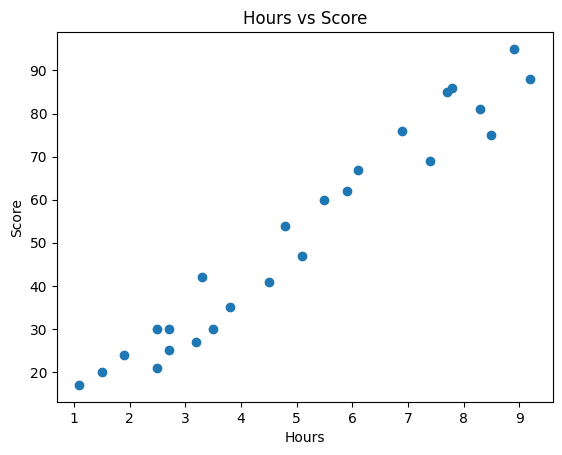

In [6]:
#Plotting a scatter for Hours vs Score
plt.scatter(data['Hours'], data['Scores'])
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Hours vs Score')
plt.show()

from the abouve visualisation it is clear that the feature(Hours Studied) and the label(Score) has a linear relation between them

#Defining the feature and label
- **Feature**: The input variable or predictor, which is the number of hours studied.
- **Label**: The output variable or target, which is the student's final score.

So, in this case:

- **Feature**: Hours studied
- **Label**: Final score

In [7]:
x = data[['Hours']] #Feature is a 2d matrix cuz it is needed for train_test_split
y = data['Scores'] #Labels

print(f"Feature Shape: {x.shape}")
print(f"Label SHape: {y.shape}")

Feature Shape: (25, 1)
Label SHape: (25,)


In [8]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [9]:
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


#Preparing the data
now that we have a brief understanding of our data it is time for us to split the data into testing and training sets. For the purpose we use skikit learns train, test splitting library

In [10]:
#importing necessary libraries
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#20% of the data will be used for testing and the rest willl be for training

In [11]:
X_train.head() #Training feature

,Hours
9,2.7
13,3.3
1,5.1
22,3.8
5,1.5


In [12]:
y_train.head() #Training label

,Scores
9,25
13,42
1,47
22,35
5,20


In [13]:
X_test.head() #Testing features

,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9


In [14]:
y_test.head() #Testing Hours

,Scores
8,81
16,30
0,21
23,76
11,62


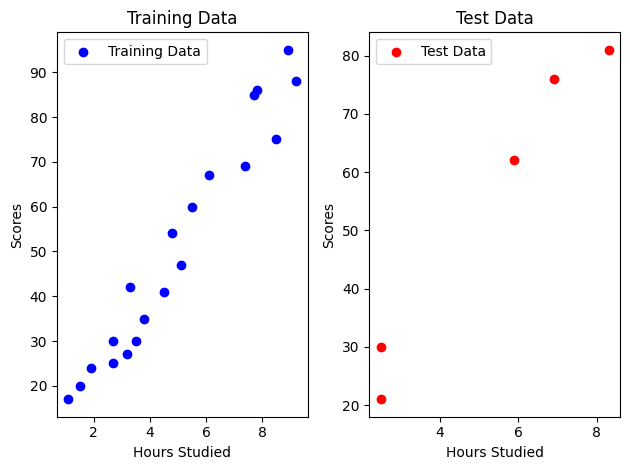

In [15]:
# Scatter plot for training data
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Training Data')
plt.legend()

# Scatter plot for test data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Test Data')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [16]:
def plot_predicitons(train_data=X_train , train_labels=y_train,
                     test_data=X_test , test_labels=y_test,
                     predictions=None):
  """Plots training data , test data and compares predictions
  """
  plt.figure(figsize=(10 , 7))
  #plot training data in blue
  plt.scatter(train_data , train_labels , c='b' , s=4 , label="Training Data")
  #plot test data in green
  plt.scatter(test_data , test_labels , c='g' , s=4 , label="Test Data")

  #Are there predictions
  if predictions is not None:
    plt.plot(test_data, predictions, c='r', label='Regression Line')
    #plt.scatter(test_data , predictions , c='r' , s=4 , label='Predictions')

  plt.legend(prop={"size":14})

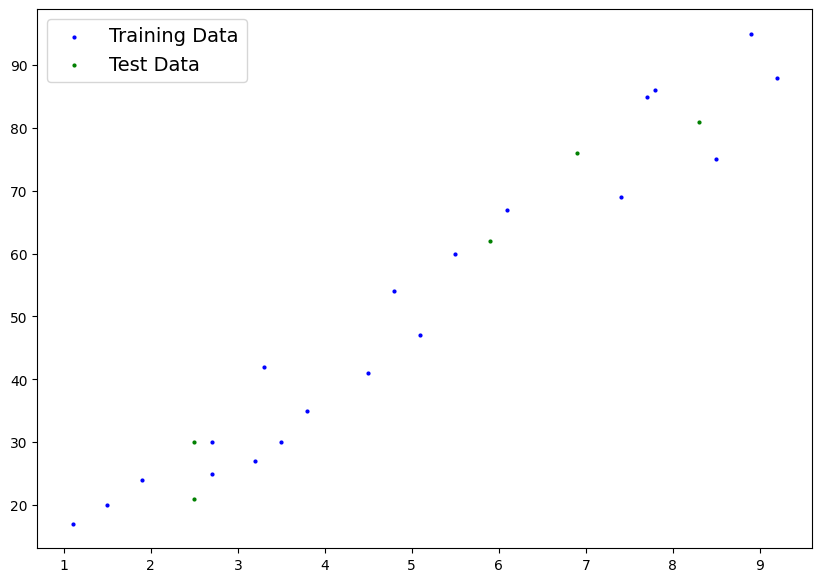

In [17]:
plot_predicitons()

#Creating the Model
now we have a good idea about our data so we are now going to prepare a Linear Regression model using PyTorch and train the model with X_train and y_train and evaluate our models predictions with X_test and y_test

For this task we will be creating a basic linear model with one input neuron and oneoutput neuron undergoing linear transformation

$$ y = xW^T + b $$
x is the input tensor
W is the weight
b is the bias vector
y is the output tensor



In [18]:
import torch
import torch.nn as nn

class LinearRegressionModel_v0(nn.Module):
  def __init__(self):
    super().__init__()
    #A linear Layer: one neuron for input Feature(Hours) and one Neuron for output Label (Grade)
    self.layer1 = nn.Linear(1,1)
    # self.layer2 = nn.Linear(10,1)

  #Forward pass methof of our model
  def forward(self , x: torch.Tensor) -> torch.Tensor:
    return self.layer1(x)

Now we have prepared our model but our data is currently in pandas dataframe format so we need to convert it to pytorch tensors

In [19]:
# Convert pandas DataFrames to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [20]:
X_train_tensor[0:10]

tensor([[2.7000],
        [3.3000],
        [5.1000],
        [3.8000],
        [1.5000],
        [3.2000],
        [4.5000],
        [8.9000],
        [8.5000],
        [3.5000]])

In [21]:
y_train_tensor[0:10]

tensor([[25.],
        [42.],
        [47.],
        [35.],
        [20.],
        [27.],
        [41.],
        [95.],
        [75.],
        [30.]])

Now we need to define a loss function and optimizer to perform **Backpropogation** and **gradient descent**

1. initially the model will put random values as weights and bias and perform linear transformation
2. It will then calculate the loss and backpropogates where it will undergo optimization
3. This process will continue until we get close to our desired outcome
4. Then we will store the model

In [22]:
#First lets do some sample predictions to see how far our model is from acutal data
torch.manual_seed(42) #set seeding for some consistency

#Create an instance of the model
model_0 = LinearRegressionModel_v0()

#Lets check the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [23]:
#Making some predictions

with torch.inference_mode():
  y_preds = model_0(X_test_tensor)

y_preds # this is our models predictions

tensor([[7.1757],
        [2.7414],
        [2.7414],
        [6.1053],
        [5.3408]])

In [24]:
y_test_tensor # These are the actual values

tensor([[81.],
        [30.],
        [21.],
        [76.],
        [62.]])

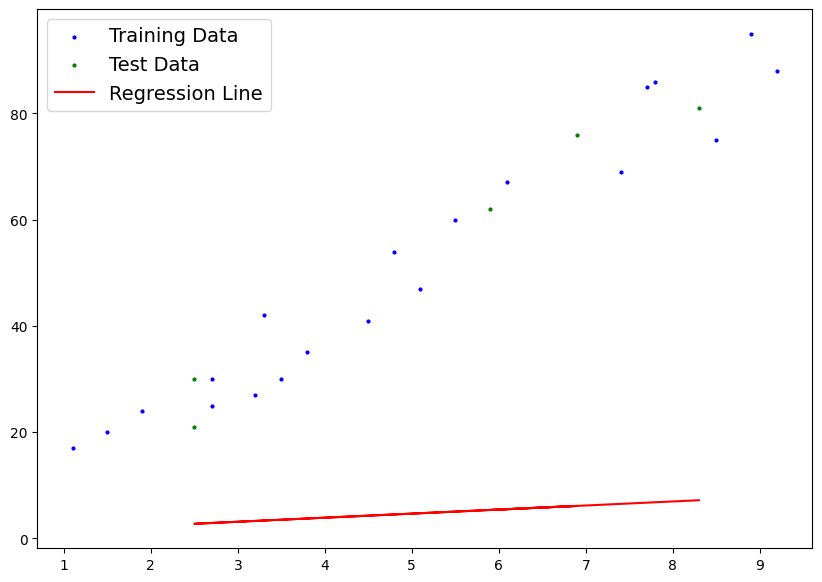

In [25]:
# sample prediction
plot_predicitons(predictions=y_preds)

As we can see the regression line is not fitting which means the model has not learnt anything so now we should train the model

#Training the Model

1. loss function - L1Loss(Mean absolute error)
2. optimizer - Adam

In [26]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

PyTorch training loop intuition

In [27]:
torch.manual_seed(42)

#Lets run a 1000 epochs
epochs = 10001

#we will store the data for further evaluation
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  ##Training
  model_0.train() #Sets to training mode (turns on gradient descent)

  #forward pass
  y_preds = model_0(X_train_tensor)

  #Calculate the loss
  loss = loss_fn(y_preds , y_train_tensor)

  #Optimize the loss
  optimizer.zero_grad()

  #Perform back propogation
  loss.backward()

  #perform gradient descent

  optimizer.step()

  #TESTING THE MODEL

  model_0.eval() #Evaluation mode turns of gradient descent
  with torch.inference_mode():
    #Get predictions
    test_preds = model_0(X_test_tensor)
    #Find the test loss
    test_loss = loss_fn(test_preds , y_test_tensor)

  #Printing wahts happening
  if epoch % 100 == 0:
    #we append values of every 100 epochs
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch} | Loss:{loss} | Test Loss:{test_loss}")

Epoch:0 | Loss:46.227882385253906 | Test Loss:49.172882080078125
Epoch:100 | Loss:45.63188934326172 | Test Loss:48.55088806152344
Epoch:200 | Loss:45.035892486572266 | Test Loss:47.92889404296875
Epoch:300 | Loss:44.43988037109375 | Test Loss:47.30687713623047
Epoch:400 | Loss:43.843849182128906 | Test Loss:46.684852600097656
Epoch:500 | Loss:43.24782180786133 | Test Loss:46.06281661987305
Epoch:600 | Loss:42.65179443359375 | Test Loss:45.44078826904297
Epoch:700 | Loss:42.05576705932617 | Test Loss:44.818763732910156
Epoch:800 | Loss:41.45973587036133 | Test Loss:44.19673156738281
Epoch:900 | Loss:40.863712310791016 | Test Loss:43.57469940185547
Epoch:1000 | Loss:40.26768112182617 | Test Loss:42.952674865722656
Epoch:1100 | Loss:39.671653747558594 | Test Loss:42.33064651489258
Epoch:1200 | Loss:39.07563400268555 | Test Loss:41.7086181640625
Epoch:1300 | Loss:38.479652404785156 | Test Loss:41.08664321899414
Epoch:1400 | Loss:37.883697509765625 | Test Loss:40.464691162109375
Epoch:1500 

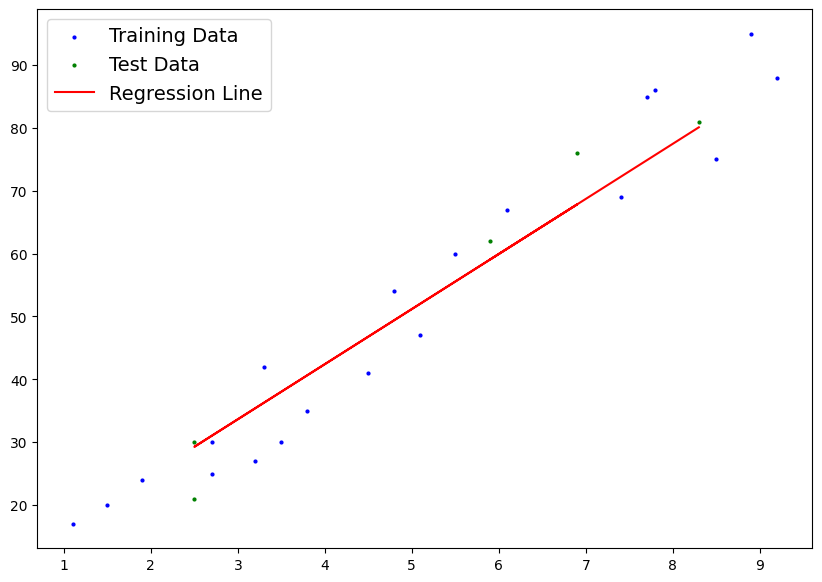

In [28]:
plot_predicitons(predictions=test_preds)

#Loss Curve
As we can see the loss made by our model decreased consistently


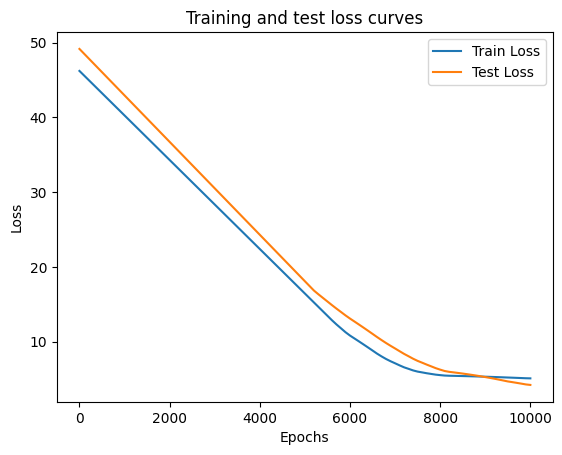

In [29]:
plt.plot(epoch_count , np.array(torch.tensor(loss_values).numpy()) , label="Train Loss")
plt.plot(epoch_count , test_loss_values , label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

#Actual value VS Predicted Value

In [30]:
pd.DataFrame({"Actual Value":y_test_tensor.detach().numpy().flatten()  , "Predicted Value":test_preds.detach().numpy().flatten()})

,Actual Value,Predicted Value
0,81.0,80.111115
1,30.0,29.254196
2,21.0,29.254196
3,76.0,67.835304
4,62.0,59.066875


# Evaluating the model
R-squared measures the proportion of the variance in the target variable that is predictable from the input features. It ranges from 0 to 1, where 1 indicates perfect predictions.

In [31]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, test_preds)
print(f"R-squared (R2): {round(r2 , 2)}")


R-squared (R2): 0.95


As we can see our model is fit enough to do real world predictions

In [32]:
# lets see how much a student will score if he studies  say 9.25 hours
hours = 9.25
feature = torch.tensor([[hours]])

model_0.eval()
with torch.inference_mode():
  pred_score = model_0(feature)

print(f"predicted score for student studying for {hours} hours: {pred_score}")

predicted score for student studying for 9.25 hours: tensor([[88.4411]])


In [33]:
# lets analyze it with our actual database

close_hours_data = data[(data['Hours'] >= 9.0) & (data['Hours'] <= 9.6)]

# Display the filtered data
print(close_hours_data)


   Hours  Scores
6    9.2      88


As we can see the prediction of our model was almost accurate

In [34]:
model_0.state_dict()

OrderedDict([('layer1.weight', tensor([[8.7684]])),
             ('layer1.bias', tensor([7.3331]))])

# Saving the model
Saving the model is essential so that we can share the model and reuse it. To save it we will use pyTorch's save function

In [35]:
!mkdir models
%cd models

/content/models


In [36]:
name = "student_grades_model_v0.pth"
torch.save(obj = model_0.state_dict() , f=name)

Now the model is saved in a new folder called models

And thus we have created a model to predict the scores of students based on the  number of hours studied. Now we can easily load the model

# THE END